In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

df = pd.read_csv("insurance.csv")

In [2]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


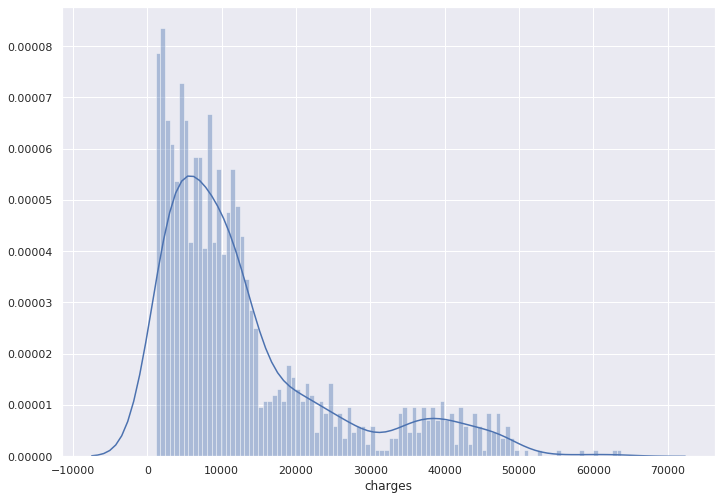

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['charges'], bins=100)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
df["sex"] = labelencoder_X.fit_transform(df["sex"])

In [25]:
df["smoker"] = labelencoder_X.fit_transform(df["smoker"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [26]:
df["region"] = labelencoder_X.fit_transform(df["region"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


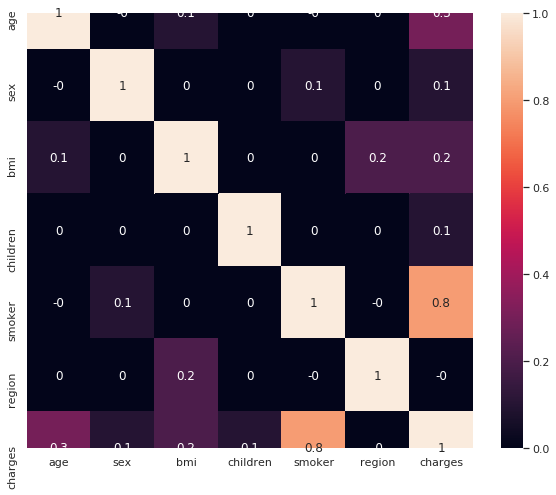

In [36]:
correlation_matrix = df.corr().round(1)
plt.figure(figsize=(10, 8))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

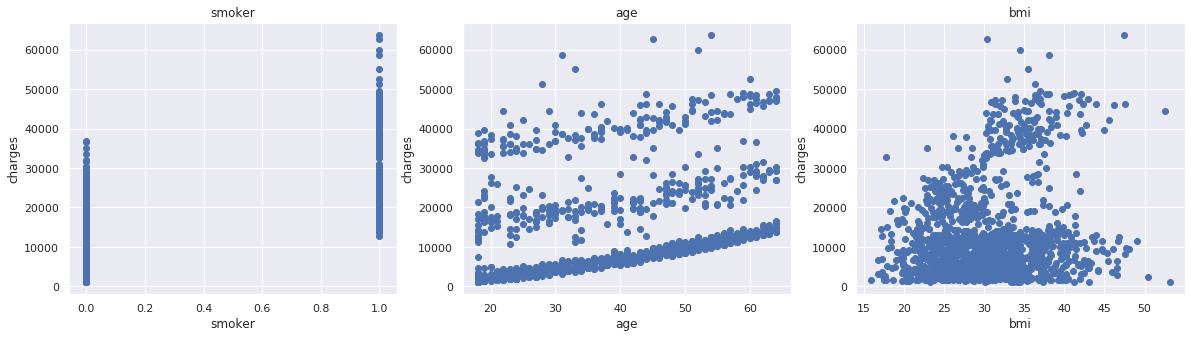

In [37]:
plt.figure(figsize=(20, 5))

features = ['smoker', 'age', 'bmi']
target = df["charges"]

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')

In [40]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 0)

df_test

,age,sex,bmi,children,smoker,region,charges
578,52,1,30.200,1,0,3,9724.53000
610,47,0,29.370,1,0,2,8547.69130
569,48,1,40.565,2,1,1,45702.02235
1034,61,1,38.380,0,0,1,12950.07120
198,51,0,18.050,0,0,1,9644.25250
...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1,15019.76005
726,41,1,28.405,1,0,1,6664.68595
1132,57,1,40.280,0,0,0,20709.02034
725,30,0,39.050,3,1,2,40932.42950


In [41]:
df_train

,age,sex,bmi,children,smoker,region,charges
621,37,1,34.100,4,1,3,40182.24600
194,18,1,34.430,0,0,2,1137.46970
240,23,0,36.670,2,1,0,38511.62830
1168,32,1,35.200,2,0,3,4670.64000
1192,58,0,32.395,1,0,0,13019.16105
...,...,...,...,...,...,...,...
763,27,1,26.030,0,0,0,3070.80870
835,42,1,35.970,2,0,2,7160.33030
1216,40,1,25.080,0,0,2,5415.66120
559,19,1,35.530,0,0,1,1646.42970


In [42]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [77]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()

y_train = df_train['charges']
x_train = df_train[['smoker']]

lin_model.fit(x_train, y_train)

y_test = df_test['charges']
x_test = df_test[['smoker']]

y_train_pred = lin_model.predict(x_train)

In [78]:

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

r2

0.6043205601488244

In [79]:
rmse

7531.735396935511

In [80]:
y_pred = lin_model.predict(x_test)

rmse_f = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_f = r2_score(y_test, y_pred)

r2_f

0.673429272717778